In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the data
dataset = pd.read_csv('./data/data_for_EHL.csv')
dataset.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,12/30/2008 0:00,EHL,246.00,250.00,228.0,250.0,245.75,232.75,478.0,9.1081,37580.0
1,12/28/2008 0:00,EHL,233.75,234.75,225.5,226.5,232.75,225.75,394.0,6.8280,29500.0
2,12/24/2008 0:00,EHL,226.00,231.00,223.0,223.0,225.75,221.50,528.0,8.9187,39260.0
3,12/23/2008 0:00,EHL,222.75,224.00,218.5,218.5,221.50,220.25,184.0,2.5838,11680.0
4,12/22/2008 0:00,EHL,221.00,226.00,215.0,226.0,220.25,223.50,381.0,5.5071,24860.0


In [3]:
dataset.tail()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
3526,01/06/2022 0:00,EHL,52.4,52.9,50.6,50.7,52.4,50.8,501.0,16.983,326890.0
3527,01/05/2022 0:00,EHL,50.8,52.0,50.0,50.3,50.8,49.7,354.0,8.756,171221.0
3528,01/04/2022 0:00,EHL,50.0,51.4,49.6,51.4,49.7,50.4,147.0,2.648,53190.0
3529,01/03/2022 0:00,EHL,50.4,52.5,48.5,48.6,50.4,48.5,481.0,13.441,266560.0
3530,01/02/2022 0:00,EHL,48.5,49.0,47.0,47.4,48.5,46.8,133.0,3.864,80610.0


In [4]:
dataset['date'] = pd.to_datetime(dataset.date)

In [5]:
dataset = dataset.sort_values(by=['date'])

In [6]:
dataset

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
193,2008-03-06,EHL,161.5,165.0,159.00,165.00,160.00,164.00,627.0,11.7034,71840.0
192,2008-03-09,EHL,161.5,164.0,160.00,164.00,161.25,160.00,443.0,7.1467,44200.0
191,2008-03-09,EHL,161.5,164.0,160.00,164.00,161.25,160.00,443.0,7.1467,44200.0
190,2008-03-10,EHL,163.5,163.5,160.00,160.50,162.50,161.25,372.0,6.3002,38940.0
189,2008-03-11,EHL,163.0,165.0,161.25,161.25,163.25,162.50,429.0,7.1573,43820.0
...,...,...,...,...,...,...,...,...,...,...,...
3291,2022-12-22,EHL,76.4,77.7,74.00,75.00,76.40,76.20,895.0,24.2170,318085.0
3290,2022-12-26,EHL,74.2,77.4,73.80,76.50,74.20,76.40,1028.0,23.1540,306497.0
3289,2022-12-27,EHL,73.3,75.5,70.20,75.50,73.30,74.20,1251.0,37.4250,516740.0
3288,2022-12-28,EHL,77.4,77.8,73.50,74.80,77.40,73.30,1536.0,44.4230,583759.0


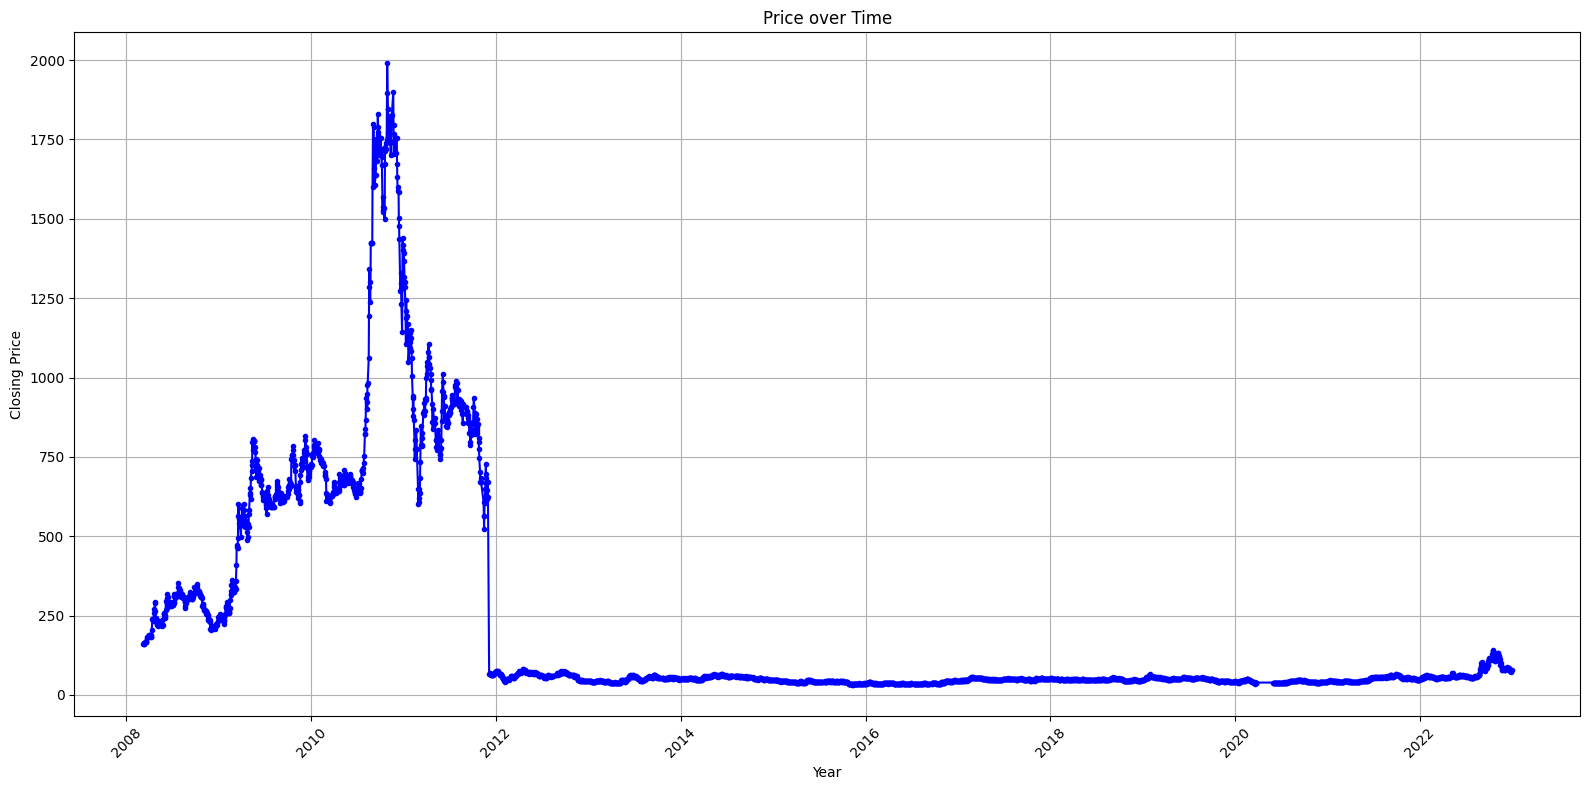

In [7]:
plt.figure(figsize=(16, 8))
plt.plot(dataset.date, dataset.closing_price, marker='.', linestyle='-', color='b')

# Formatting the plot
plt.title('Price over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
dataset.dropna(subset=['closing_price'],inplace=True)

In [9]:
dataset.isnull().sum()

date                         0
trading_code                 0
last_traded_price           21
high                        21
low                         21
opening_price                8
closing_price                0
yesterdays_closing_price     0
trade                       21
value_mn                    21
volume                      21
dtype: int64

In [10]:
data = dataset.reset_index()['closing_price']

In [11]:
data

0       160.00
1       161.25
2       161.25
3       162.50
4       163.25
         ...  
3519     76.40
3520     74.20
3521     73.30
3522     77.40
3523     78.90
Name: closing_price, Length: 3524, dtype: float64

In [12]:
data.shape

(3524,)

In [13]:
# preprocessing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [15]:
data.shape

(3524, 1)

In [16]:
data

array([[0.0655721 ],
       [0.06621045],
       [0.06621045],
       ...,
       [0.02129561],
       [0.02338942],
       [0.02415545]])

In [17]:
# train & test data splitting

train_size = int(len(data)*0.8)
test_size = len(data) - train_size

train_size, test_size

(2819, 705)

In [18]:
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [20]:
time_step = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [21]:
print(x_train)

[[0.0655721  0.06621045 0.06621045 ... 0.14204734 0.14562214 0.14574981]
 [0.06621045 0.06621045 0.06684881 ... 0.14562214 0.14574981 0.141792  ]
 [0.06621045 0.06684881 0.06723183 ... 0.14574981 0.141792   0.14102597]
 ...
 [0.01128616 0.01077548 0.01036693 ... 0.00612823 0.00561755 0.0053622 ]
 [0.01077548 0.01036693 0.00995838 ... 0.00561755 0.0053622  0.00551541]
 [0.01036693 0.00995838 0.00944769 ... 0.0053622  0.00551541 0.00571968]]


In [22]:
print(y_train)

[0.141792   0.14102597 0.14306871 ... 0.00551541 0.00571968 0.00541327]


In [23]:
print(x_test)

[[0.00500472 0.00510686 0.00505579 ... 0.00362587 0.00362587 0.00362587]
 [0.00510686 0.00505579 0.00495366 ... 0.00362587 0.00362587 0.00362587]
 [0.00505579 0.00495366 0.0043919  ... 0.00362587 0.00362587 0.00362587]
 ...
 [0.01149044 0.01261395 0.01337998 ... 0.02497255 0.0227766  0.02287874]
 [0.01261395 0.01337998 0.01337998 ... 0.0227766  0.02287874 0.02175523]
 [0.01337998 0.01337998 0.01297143 ... 0.02287874 0.02175523 0.02129561]]


In [24]:
print(y_test)

[0.00362587 0.00362587 0.00418763 0.00362587 0.00362587 0.00362587
 0.00362587 0.00362587 0.00362587 0.00372801 0.00388121 0.00372801
 0.00423869 0.00408549 0.00459617 0.00464724 0.00454511 0.00485152
 0.0053622  0.00515793 0.00587289 0.00668999 0.0061793  0.00648571
 0.00592396 0.00633251 0.00607716 0.00582182 0.00577075 0.00607716
 0.00623037 0.0060261  0.0060261  0.00607716 0.00689426 0.00694533
 0.00679213 0.00648571 0.00720067 0.00786457 0.00745602 0.00755815
 0.00730281 0.00735388 0.00730281 0.00755815 0.00755815 0.00714961
 0.00684319 0.00663892 0.00668999 0.00638358 0.00653678 0.00638358
 0.00638358 0.00648571 0.00653678 0.00704747 0.00709854 0.00694533
 0.00679213 0.00658785 0.00689426 0.00689426 0.00541327 0.00490259
 0.00480045 0.00500472 0.00515793 0.00500472 0.00469831 0.00490259
 0.00469831 0.00469831 0.00474938 0.00469831 0.00515793 0.00490259
 0.00495366 0.00490259 0.00469831 0.00444297 0.00428976 0.00403442
 0.00428976 0.00428976 0.00428976 0.00377908 0.00377908 0.0036

In [25]:
print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(2718, 100)
(2718,)
(604, 100)
(604,)


(None, None)

In [26]:
# reshape input into 3D array
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [27]:
x_train.shape, x_test.shape

((2718, 100, 1), (604, 100, 1))

In [28]:
# create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam 

In [29]:
model = Sequential()

model.add(LSTM(units = 64,activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 32,activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 24,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error')

In [31]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
)

In [32]:
model_history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 100, callbacks = [early_stopping],verbose = 1)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - loss: 0.0255 - val_loss: 1.3479e-04
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0039 - val_loss: 8.0217e-05
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.0031 - val_loss: 9.6549e-05
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 0.0035 - val_loss: 1.0245e-04
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0027 - val_loss: 8.1920e-05
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.0024 - val_loss: 1.0191e-04
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.0023 - val_loss: 7.5797e-05
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0020 - val_loss: 7.6313e-05
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - loss: 0.0016 - val_loss: 1.5483e-04
Epoch 10/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0017 - val_loss: 6.5904e-05
Epoch 11/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - loss: 0.0019 - val_los

In [39]:
model_history.history.keys()

dict_keys(['loss', 'val_loss'])

In [40]:
predict = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [41]:
predict = scaler.inverse_transform(predict)

In [42]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

In [43]:
math.sqrt(mean_squared_error(y_test,predict))

54.544287067803616

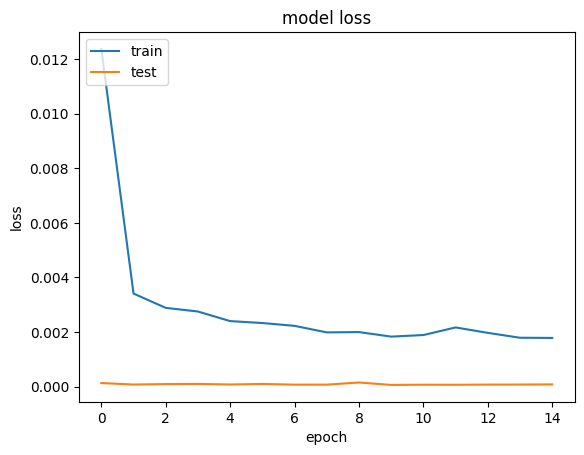

In [45]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# save model
model.save("model_EHL.h5")

In [48]:
from tensorflow.keras.models import load_model
model2 = load_model('model_EHL.h5')
result = model2.predict(x_train)
result = scaler.inverse_transform(result)
print(result)

85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step
[[324.105   ]
 [321.61722 ]
 [318.71106 ]
 ...
 [ 51.733112]
 [ 51.731873]
 [ 51.73052 ]]
